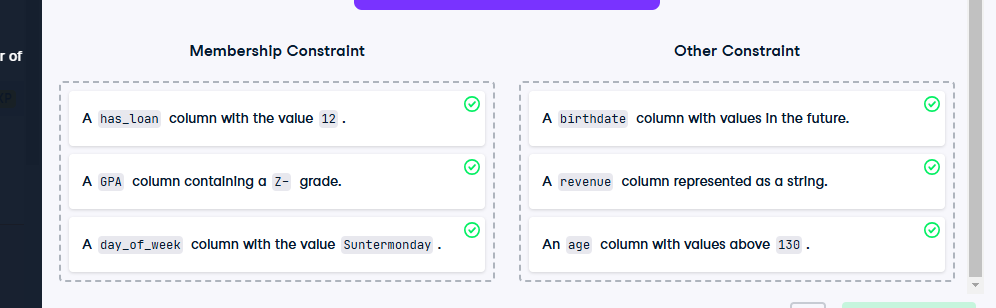

# Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.



* Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
* Print the unique values of the survey columns in airlines using the .unique() method.
* Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
* Find rows of airlines with a cleanliness value not in categories and print the output.
* Print the rows with the consistent categories of cleanliness only.



In [ ]:
# Print categories DataFrame
print(categories)
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

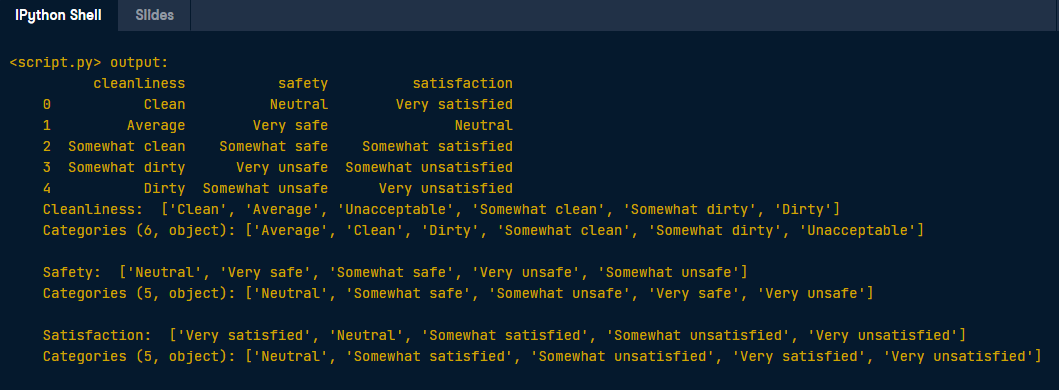

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

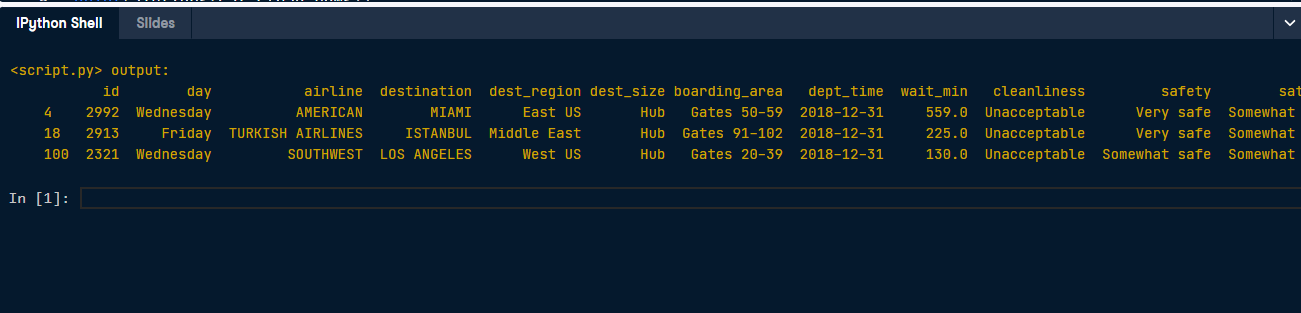

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

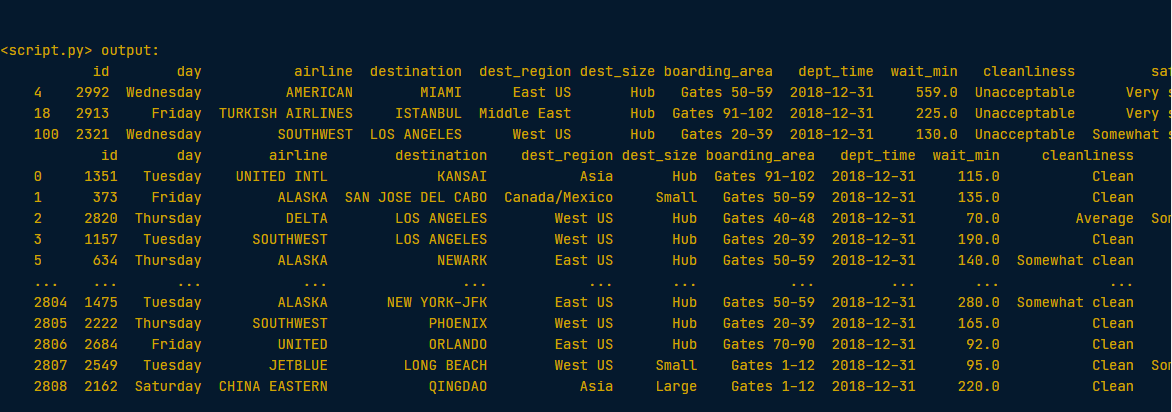

Great _consistent_ work! Keep it up! In the next lesson, we'll be looking at more in depth solutions to dealing with dirty categorical data

In [4]:
import pandas as pd

airlines = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset.csv")
airlines.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


# Inconsistent categories

In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.


* Print the unique values in dest_region and dest_size respectively.
* Change the capitalization of all values of dest_region to lowercase.
Replace the 'eur' with 'europe' in dest_region using the .replace() method.



In [6]:
# Print unique values of both columns
# print(airlines['dest_region'].unique())
# print(airlines['dest_region'].unique())

print(airlines['Country Name'].unique())
print(airlines['Continents'].unique())

['United States' 'Canada' 'France' 'Brazil' 'United Kingdom' 'Italy'
 'Mexico' 'Panama' 'Pakistan' 'Australia' 'South Africa'
 'Venezuela, Bolivarian Republic of' 'China' 'Madagascar' 'Colombia'
 'Mauritania' 'Myanmar' 'Congo' 'Zambia' 'Samoa' 'New Caledonia'
 'Equatorial Guinea' 'Papua New Guinea' 'Bahamas' 'Indonesia'
 'Russian Federation' 'Bolivia, Plurinational State of' 'Kenya'
 'Burkina Faso' 'Guatemala' 'Taiwan, Province of China' 'India' 'Norway'
 'Costa Rica' 'Portugal' 'Sri Lanka' 'French Polynesia' 'Mozambique'
 'Algeria' 'Nepal' 'Bulgaria' 'Iran, Islamic Republic of' 'Honduras'
 'Sudan' 'Japan' 'Dominican Republic' 'Iceland' 'Viet Nam'
 'Syrian Arab Republic' 'Romania' 'Cayman Islands' 'Germany' 'Slovakia'
 'Botswana' 'Saudi Arabia' 'Ecuador' 'Cameroon' 'Mongolia' 'Dominica'
 'Paraguay' 'Israel' 'Croatia' 'Argentina' 'Vanuatu' 'New Zealand'
 'Congo, The Democratic Republic of the' 'Ukraine' 'Sweden' 'Nicaragua'
 'Malaysia' 'Ethiopia' 'Poland' 'Cuba' 'Spain' 'Cambodia' 'Oman

* Change the capitalization of all values of dest_region to lowercase.
* Replace the 'eur' with 'europe' in dest_region using the .replace() method.



In [8]:
# Lower dest_region column and then replace "eur" with "europe"
# airlines['dest_region'] = airlines['dest_region'].str.lower()
# airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

airlines[''] = airlines['Country Name'].str.lower()
airlines['dest_region'] = airlines['Continents'].replace({'Europe':'EUROPE'})


* Strip white spaces from the dest_size column using the .strip() method.
* Verify that the changes have been into effect by printing the unique values of the columns using .unique() .


In [ ]:
# # Remove white spaces from `dest_size`
# airlines['dest_size'] = airlines['dest_size'].str.strip()

# # Verify changes have been effected
# print(airlines['dest_region'].unique())
# print(airlines['dest_size'].unique())

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

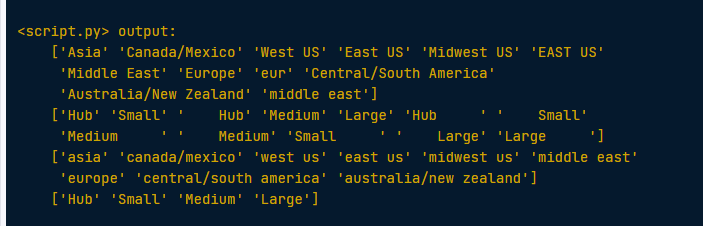

# Remapping categories

To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!



* Create the ranges and labels for the wait_type column mentioned in the description.
* Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
* Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
* Create the day_week column by using .replace().


In [11]:
import pandas as pd

airline1 = pd.read_csv("/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv")
airline1.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [13]:
# Define the mapping for days of the week
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Apply the mapping to the DayOfWeek column
airline1['DayOfWeek'] = airline1['DayOfWeek'].replace(day_mapping)

airline1.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,Wednesday,15,205,1
1,2,US,1558,PHX,CLT,Wednesday,15,222,1
2,3,AA,2400,LAX,DFW,Wednesday,20,165,1
3,4,AA,2466,SFO,DFW,Wednesday,20,195,1
4,5,AS,108,ANC,SEA,Wednesday,30,202,0


In [18]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airline1['wait_type'] = pd.cut(airline1["Length"], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airline1['day_week'] = airline1['DayOfWeek'].replace(mappings)

In [22]:
airline1.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,wait_type,day_week
0,1,CO,269,SFO,IAH,Wednesday,15,205,1,long,weekday
1,2,US,1558,PHX,CLT,Wednesday,15,222,1,long,weekday
2,3,AA,2400,LAX,DFW,Wednesday,20,165,1,medium,weekday
3,4,AA,2466,SFO,DFW,Wednesday,20,195,1,long,weekday
4,5,AS,108,ANC,SEA,Wednesday,30,202,0,long,weekday


**Awesome work! You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an assert statement to check your changes passed.**

# Removing titles and taking names

While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.



* Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
* Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.


In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

Great work! By normalizing full names this way, you can now easily split them into first names and last names!

# Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.



* Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
* Isolate the rows of airlines with resp_length higher than 40.
* Assert that the smallest survey_response length in airlines_survey is now bigger than 40.


In [ ]:
# Store length of each row in survey_response column
resp_length = airlines["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

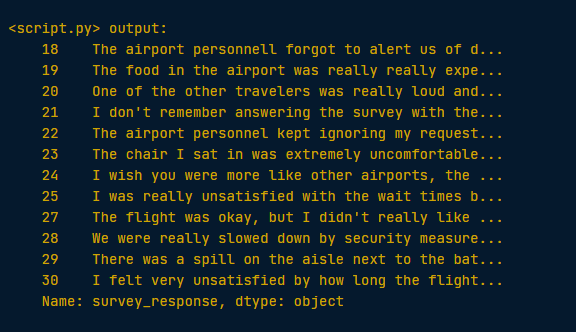